In [126]:
import pandas as pd
import numpy as np
# import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt


raw_train = pd.read_csv('KOSPI.csv')


In [ ]:

#필요없는 열 삭제
raw_train = raw_train.drop(['Vol.','Change %'], axis=1)

#열 이름 바꾸기
raw_train = raw_train.rename(columns={'Date':'date', 'Price':'close', 'Open':'open', 'High':'high','Low':'low'})



# 데이터에 , 없애는 코드 
raw_train['close']=raw_train['close'].str.replace(',','')
raw_train['open']=raw_train['open'].str.replace(',','')
raw_train['high']=raw_train['high'].str.replace(',','')
raw_train['low']=raw_train['low'].str.replace(',','')



# 다 자료형이 object라 자료형 변환시키기
raw_train = raw_train.astype({'close':'float','open':'float','high':'float','low':'float'})

In [128]:
#date열 str에서 datetime형으로 변환
raw_train['date'] = pd.to_datetime(raw_train['date'])


#date를 인덱스로 지정하기
raw_train.set_index('date', inplace= True)


In [185]:
raw_train.reset_index()

,date,close,open,high,low
0,2017-01-02,2026.16,2022.23,2031.79,2015.68
1,2017-01-03,2043.97,2034.31,2044.07,2028.47
2,2017-01-04,2045.64,2046.29,2046.29,2040.61
3,2017-01-05,2041.95,2045.52,2046.50,2039.49
4,2017-01-06,2049.12,2048.11,2051.84,2045.66
...,...,...,...,...,...
1470,2022-12-23,2313.69,2325.86,2333.08,2311.90
1471,2022-12-26,2317.14,2312.54,2321.92,2304.20
1472,2022-12-27,2332.79,2327.52,2335.99,2321.48
1473,2022-12-28,2280.45,2296.45,2296.45,2276.90


In [31]:
import ta
close = raw_train['close']
rsi = ta.momentum.rsi(close)
macd = ta.trend.macd(close)
macdsignal = ta.trend.macd_signal(close)
bol_h = ta.volatility.bollinger_hband(close)
bol_avg = ta.volatility.bollinger_mavg(close)
bol_l = ta.volatility.bollinger_lband(close)


In [53]:
returns= ta.others.daily_return(close)
returns

date
2017-01-02   -16.745712
2017-01-03     0.879003
2017-01-04     0.081704
2017-01-05    -0.180384
2017-01-06     0.351135
                ...    
2022-12-23    -1.826259
2022-12-26     0.149112
2022-12-27     0.675402
2022-12-28    -2.243665
2022-12-29    -1.931636
Name: d_ret, Length: 1475, dtype: float64

In [204]:
df_list = [raw_train, rsi, macd, macdsignal, bol_h, bol_avg, bol_l,returns]
df_all = pd.concat(df_list, axis=1)

In [205]:
df_all = df_all.astype("float")

In [210]:
df_all = df_all.reset_index()

In [207]:
df_all['date_']=df_all['date'].dt.strftime('%Y%m')

In [208]:
df_all.set_index("date", inplace=True)

In [209]:
df_all.rename(columns={"date":"date_"}, inplace=True)

In [193]:
# import pandas as pd
# xlsx = pd.read_excel("CSI.xlsx")
# xlsx.to_csv("CSI.csv")
df5 = pd.read_csv("CSI.csv", header=1)

In [172]:
df5 = setup(df5)

In [211]:
#월별데이터 일별데이터에 붙이기
def setup(df):
    # df = pd.read_csv(df, header=1)
    df = df.transpose()
    df = df.iloc[2:,:2]
    df.set_index(df.iloc[:,0],inplace=True)
    df.columns=['Date','CSI']
    df['date_']=df['Date'].astype("string")
    df['date_']=df['date_'].str.replace("월","")
    df.drop('Date',axis=1,inplace=True)
    return df

#후처리
def wrap(df):
    global df_all
    df1 = setup(df)
    result_df = pd.merge(df_all, df1, on='date_', how='left')
    # result_df = result_df.drop(['Unnamed: 0'], axis=1)
    return result_df

In [212]:
CSI = wrap(df5)

In [214]:
result_df = CSI.set_index("date")

In [216]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1475 entries, 2017-01-02 to 2022-12-29
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            1475 non-null   float64
 1   open             1475 non-null   float64
 2   high             1475 non-null   float64
 3   low              1475 non-null   float64
 4   rsi              1462 non-null   float64
 5   MACD_12_26       1450 non-null   float64
 6   MACD_sign_12_26  1442 non-null   float64
 7   hband            1456 non-null   float64
 8   mavg             1456 non-null   float64
 9   lband            1456 non-null   float64
 10  d_ret            1475 non-null   float64
 11  date_            1475 non-null   object 
 12  CSI              1475 non-null   object 
dtypes: float64(11), object(2)
memory usage: 161.3+ KB


In [217]:
result_df = result_df.drop(['date_'], axis=1)

In [220]:
result_df = result_df.astype("float")

In [221]:
result_df.isnull().sum()

close               0
open                0
high                0
low                 0
rsi                13
MACD_12_26         25
MACD_sign_12_26    33
hband              19
mavg               19
lband              19
d_ret               0
CSI                 0
dtype: int64

In [236]:
result_df.lband.fillna(result_df.lband.mean(),inplace = True)

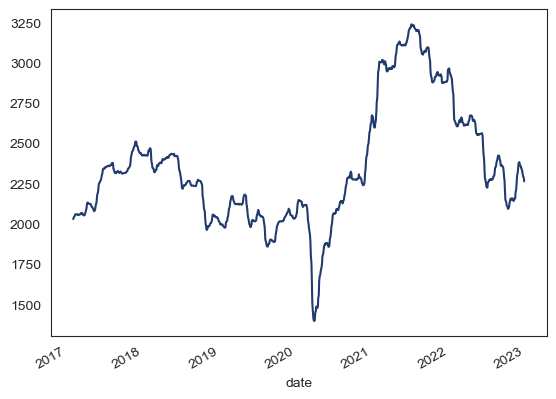

In [235]:
sns.set_style('white')
sns.set_palette('cividis')
result_df['lband'].plot();

In [238]:
result_df.isnull().sum()

close              0
open               0
high               0
low                0
rsi                0
MACD_12_26         0
MACD_sign_12_26    0
hband              0
mavg               0
lband              0
d_ret              0
CSI                0
dtype: int64

In [239]:
result_df.to_csv("raw_train.csv")